In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')

In [21]:
# do wyrzucenia bo wszystkie są unikatowe
#df["ScreenName"].value_counts().sort_values()
#df["UserName"].value_counts().sort_values()

df = df.drop(columns=["ScreenName", "UserName"])

In [34]:
df.isna().sum()

UserName                0
ScreenName              0
Location             8590
TweetAt                 0
OriginalTweet           0
Sentiment               0
is_at_sign              0
how_many_at_signs       0
dtype: int64

In [24]:
df.columns

Index(['Location', 'OriginalTweet', 'Sentiment', 'Day', 'Month'], dtype='object')

In [22]:
df["Day"] = df["TweetAt"].apply(lambda x: int(x[:2]))
df["Month"] = df["TweetAt"].apply(lambda x: int(x[3:5]))
df = df.drop(columns=["TweetAt"])

In [10]:
country_abbreviations = [
    "AF", "AX", "AL", "DZ", "AS", "AD", "AO", "AI", "AQ", "AG", "AR", "AM", "AW", "AU", "AT", "AZ",
    "BS", "BH", "BD", "BB", "BY", "BE", "BZ", "BJ", "BM", "BT", "BO", "BQ", "BA", "BW", "BV", "BR",
    "IO", "BN", "BG", "BF", "BI", "CV", "KH", "CM", "CA", "KY", "CF", "TD", "CL", "CN", "CX", "CC",
    "CO", "KM", "CD", "CG", "CK", "CR", "CI", "HR", "CU", "CW", "CY", "CZ", "DK", "DJ", "DM", "DO",
    "EC", "EG", "SV", "GQ", "ER", "EE", "SZ", "ET", "FK", "FO", "FJ", "FI", "FR", "GF", "PF", "TF",
    "GA", "GM", "GE", "DE", "GH", "GI", "GR", "GL", "GD", "GP", "GU", "GT", "GG", "GN", "GW", "GY",
    "HT", "HM", "VA", "HN", "HK", "HU", "IS", "IN", "ID", "IR", "IQ", "IE", "IM", "IL", "IT", "JM",
    "JP", "JE", "JO", "KZ", "KE", "KI", "KP", "KR", "KW", "KG", "LA", "LV", "LB", "LS", "LR", "LY",
    "LI", "LT", "LU", "MO", "MG", "MW", "MY", "MV", "ML", "MT", "MH", "MQ", "MR", "MU", "YT", "MX",
    "FM", "MD", "MC", "MN", "ME", "MS", "MA", "MZ", "MM", "NA", "NR", "NP", "NL", "NC", "NZ", "NI",
    "NE", "NG", "NU", "NF", "MP", "NO", "OM", "PK", "PW", "PS", "PA", "PG", "PY", "PE", "PH", "PN",
    "PL", "PT", "PR", "QA", "MK", "RO", "RU", "RW", "RE", "BL", "SH", "KN", "LC", "MF", "PM", "VC",
    "WS", "SM", "ST", "SA", "SN", "RS", "SC", "SL", "SG", "SX", "SK", "SI", "SB", "SO", "ZA", "GS",
    "SS", "ES", "LK", "SD", "SR", "SJ", "SE", "CH", "SY", "TW", "TJ", "TZ", "TH", "TL", "TG", "TK",
    "TO", "TT", "TN", "TR", "TM", "TC", "TV", "UG", "UA", "AE", "GB", "US", "UM", "UY", "UZ", "VU",
    "VE", "VN", "VG", "VI", "WF", "EH", "YE", "ZM", "ZW"
]

In [11]:
countries = [
    "Afghanistan", "Åland Islands", "Albania", "Algeria", "American Samoa", "Andorra", "Angola", "Anguilla", 
    "Antarctica", "Antigua and Barbuda", "Argentina", "Armenia", "Aruba", "Australia", "Austria", "Azerbaijan", 
    "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", 
    "Bolivia", "Bonaire, Sint Eustatius and Saba", "Bosnia and Herzegovina", "Botswana", "Bouvet Island", "Brazil", 
    "British Indian Ocean Territory", "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", 
    "Cambodia", "Cameroon", "Canada", "Cayman Islands", "Central African Republic", "Chad", "Chile", "China", 
    "Christmas Island", "Cocos (Keeling) Islands", "Colombia", "Comoros", "Congo (DRC)", "Congo", "Cook Islands", 
    "Costa Rica", "Côte d'Ivoire", "Croatia", "Cuba", "Curaçao", "Cyprus", "Czechia", "Denmark", "Djibouti", 
    "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", 
    "Eswatini", "Ethiopia", "Falkland Islands", "Faroe Islands", "Fiji", "Finland", "France", "French Guiana", 
    "French Polynesia", "French Southern Territories", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Gibraltar", 
    "Greece", "Greenland", "Grenada", "Guadeloupe", "Guam", "Guatemala", "Guernsey", "Guinea", "Guinea-Bissau", 
    "Guyana", "Haiti", "Heard Island and McDonald Islands", "Vatican City", "Honduras", "Hong Kong", "Hungary", 
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Isle of Man", "Israel", "Italy", "Jamaica", "Japan", 
    "Jersey", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea (North)", "Korea (South)", "Kuwait", "Kyrgyzstan", 
    "Lao People's Democratic Republic", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", 
    "Lithuania", "Luxembourg", "Macao", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", 
    "Marshall Islands", "Martinique", "Mauritania", "Mauritius", "Mayotte", "Mexico", "Micronesia", "Moldova", 
    "Monaco", "Mongolia", "Montenegro", "Montserrat", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", 
    "Nepal", "Netherlands", "New Caledonia", "New Zealand", "Nicaragua", "Niger", "Nigeria", "Niue", "Norfolk Island", 
    "Northern Mariana Islands", "Norway", "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", 
    "Paraguay", "Peru", "Philippines", "Pitcairn", "Poland", "Portugal", "Puerto Rico", "Qatar", "North Macedonia", 
    "Romania", "Russia", "Rwanda", "Réunion", "Saint Barthélemy", "Saint Helena", "Saint Kitts and Nevis", 
    "Saint Lucia", "Saint Martin (French part)", "Saint Pierre and Miquelon", "Saint Vincent and the Grenadines", 
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", 
    "Singapore", "Sint Maarten (Dutch part)", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", 
    "South Georgia and the South Sandwich Islands", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", 
    "Svalbard and Jan Mayen", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", 
    "Timor-Leste", "Togo", "Tokelau", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", 
    "Turks and Caicos Islands", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", 
    "United States", "United States Minor Outlying Islands", "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela", 
    "Vietnam", "Virgin Islands (British)", "Virgin Islands (U.S.)", "Wallis and Futuna", "Western Sahara", "Yemen", 
    "Zambia", "Zimbabwe", "England", "Scotland", "Wales", "Northern Ireland"
]


In [12]:
capitals = [
    "Kabul", "Mariehamn", "Tirana", "Algiers", "Pago Pago", "Andorra la Vella", "Luanda", "The Valley", "", "Saint John's",
    "Buenos Aires", "Yerevan", "Oranjestad", "Canberra", "Vienna", "Baku", "Nassau", "Manama", "Dhaka", "Bridgetown",
    "Minsk", "Brussels", "Belmopan", "Porto-Novo", "Hamilton", "Thimphu", "Sucre", "Kralendijk", "Sarajevo", "Gaborone", "",
    "Brasília", "Diego Garcia", "Bandar Seri Begawan", "Sofia", "Ouagadougou", "Gitega", "Praia", "Phnom Penh", "Yaoundé",
    "Ottawa", "George Town", "Bangui", "N'Djamena", "Santiago", "Beijing", "Flying Fish Cove", "West Island", "Bogotá",
    "Moroni", "Kinshasa", "Brazzaville", "Avarua", "San José", "Yamoussoukro", "Zagreb", "Havana", "Willemstad", "Nicosia",
    "Prague", "Copenhagen", "Djibouti", "Roseau", "Santo Domingo", "Quito", "Cairo", "San Salvador", "Malabo", "Asmara",
    "Tallinn", "Mbabane", "Addis Ababa", "Stanley", "Tórshavn", "Suva", "Helsinki", "Paris", "Cayenne", "Papeetē",
    "Port-aux-Français", "Libreville", "Banjul", "Tbilisi", "Berlin", "Accra", "Gibraltar", "Athens", "Nuuk", "St. George's",
    "Basse-Terre", "Hagåtña", "Guatemala City", "St. Peter Port", "Conakry", "Bissau", "Georgetown", "Port-au-Prince", "",
    "Vatican City", "Tegucigalpa", "Hong Kong", "Budapest", "Reykjavik", "New Delhi", "Jakarta", "Tehran", "Baghdad",
    "Dublin", "Douglas", "Jerusalem", "Rome", "Kingston", "Tokyo", "Saint Helier", "Amman", "Nur-Sultan", "Nairobi",
    "South Tarawa", "Pyongyang", "Seoul", "Kuwait City", "Bishkek", "Vientiane", "Riga", "Beirut", "Maseru", "Monrovia",
    "Tripoli", "Vaduz", "Vilnius", "Luxembourg", "Macao", "Antananarivo", "Lilongwe", "Kuala Lumpur", "Malé", "Bamako",
    "Valletta", "Majuro", "Fort-de-France", "Nouakchott", "Port Louis", "Mamoudzou", "Mexico City", "Palikir", "Chișinău",
    "Monaco", "Ulaanbaatar", "Podgorica", "Plymouth", "Rabat", "Maputo", "Naypyidaw", "Windhoek", "Yaren", "Kathmandu",
    "Amsterdam", "Nouméa", "Wellington", "Managua", "Niamey", "Abuja", "Alofi", "Kingston", "Saipan", "Oslo", "Muscat",
    "Islamabad", "Ngerulmud", "Ramallah", "Panama City", "Port Moresby", "Asunción", "Lima", "Manila", "Adamstown",
    "Warsaw", "Lisbon", "San Juan", "Doha", "Skopje", "Bucharest", "Moscow", "Kigali", "Saint-Denis", "Gustavia",
    "Jamestown", "Basseterre", "Castries", "Marigot", "Saint-Pierre", "Kingstown", "Apia", "San Marino", "São Tomé",
    "Riyadh", "Dakar", "Belgrade", "Victoria", "Freetown", "Singapore", "Philipsburg", "Bratislava", "Ljubljana",
    "Honiara", "Mogadishu", "Pretoria", "King Edward Point", "Juba", "Madrid", "Colombo", "Khartoum", "Paramaribo",
    "Longyearbyen", "Stockholm", "Bern", "Damascus", "Taipei", "Dushanbe", "Dodoma", "Bangkok", "Dili", "Lomé", "Fakaofo",
    "Nukuʻalofa", "Port of Spain", "Tunis", "Ankara", "Ashgabat", "Cockburn Town", "Funafuti", "Kampala", "Kyiv",
    "Abu Dhabi", "London", "Washington, D.C.", "", "Montevideo", "Tashkent", "Port Vila", "Caracas", "Hanoi", "Road Town",
    "Charlotte Amalie", "Mata-Utu", "El Aaiún", "Sana'a", "Lusaka", "Harare", "London", "Edinburgh", "Cardiff", "Belfast"
]
capitals_to_country = dict(zip(capitals, countries))


In [13]:
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", 
    "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", 
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", 
    "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", 
    "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", 
    "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

In [14]:
us_state_abbreviations = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

In [ ]:
def map_to_country(x):
    x = str(x)
    
    if "USA" in x:
        return "United States"
    if "United States" in x:
        return "United States"
    if "UK" in x:
        return "United Kingdom"
    for i in range(len(x)):
        for j in range(i + 1, len(x) + 1):
            substring = x[i:j]
            if substring in us_state_abbreviations:
                if substring == " CA ":
                    print(x)
                return "United States"
            if substring in us_states:
                if substring == " CA ":
                    print(x)
                return "United States"
            if substring in capitals:
                if substring == " CA ":
                    print(x)
                return capitals_to_country[substring]
            if substring in countries:
                if substring == " CA ":
                    print(x)
                return substring
            if substring in country_abbreviations:
                if substring == " CA ":
                    print(x)
                return countries[country_abbreviations.index(substring)]
                   
    return None



In [16]:
df["Country"] = df["Location"].apply(lambda x: map_to_country(x))

In [35]:
import matplotlib.pyplot as plt
fig,ax = plt.subplot(figsize=(10,5))
df["Country"].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(20, 10))

AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 640x480 with 0 Axes>

In [36]:
df["is_at_sign"] = df["OriginalTweet"].apply(lambda x: "@" in x)
df["how_many_at_signs"] = df["OriginalTweet"].apply(lambda x: x.count("@"))

C:\Users\bzabk\AppData\Local\Temp\ipykernel_41280\154465657.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["does not contains @","contains @",], horizontalalignment='center',color='#e3dac9')
C:\Users\bzabk\AppData\Local\Temp\ipykernel_41280\154465657.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),color='#e3dac9')


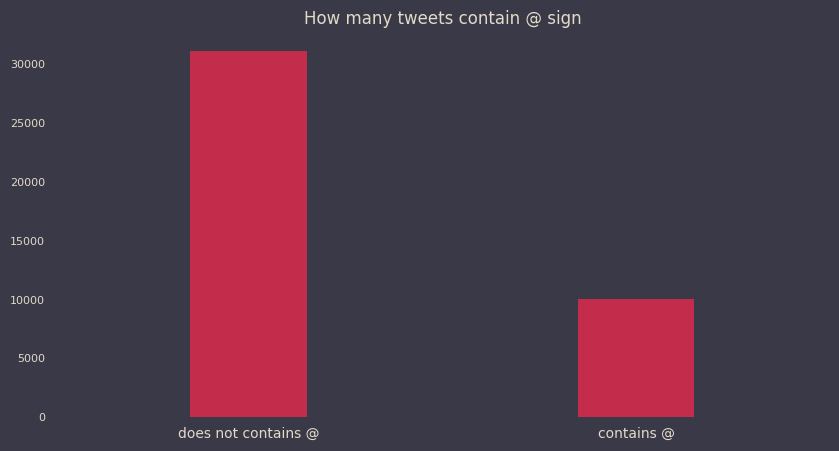

In [52]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="is_at_sign", data=df,ax=ax,color='crimson',width=0.3)
ax.set_ylabel('')
ax.set_ylabel('')
ax.set_xlabel('')

ax.tick_params(axis='y', colors='#3a3947')
ax.tick_params(axis='x', colors='#3a3947')

ax.tick_params(axis='y', labelsize=8)

ax.set_xticklabels(["does not contains @","contains @",], horizontalalignment='center',color='#e3dac9')
ax.set_yticklabels(ax.get_yticklabels(),color='#e3dac9')

ax.set_facecolor('#3a3947')
ax.set_title("How many tweets contain @ sign",color='#e3dac9')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('#3a3947')
fig.set_facecolor('#3a3947')

C:\Users\bzabk\AppData\Local\Temp\ipykernel_41280\1060414077.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center',color='#e3dac9')
C:\Users\bzabk\AppData\Local\Temp\ipykernel_41280\1060414077.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),color='#e3dac9')


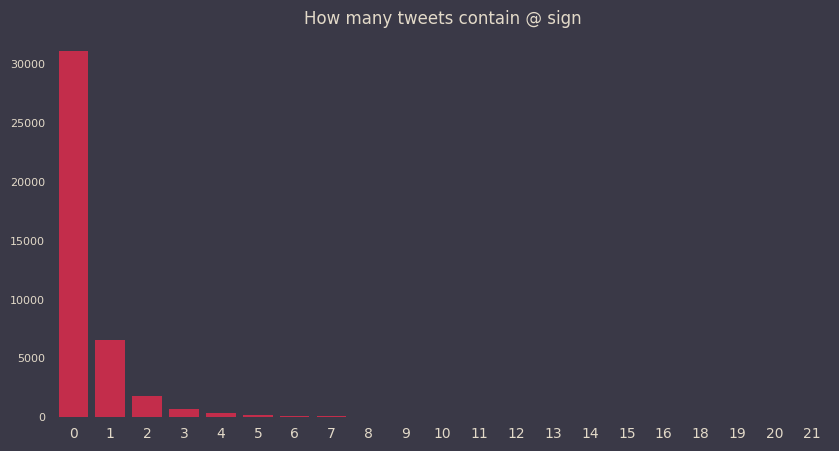

In [51]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="how_many_at_signs", data=df,ax=ax,color='crimson')
ax.set_ylabel('')
ax.set_ylabel('')
ax.set_xlabel('')

ax.tick_params(axis='y', colors='#3a3947')
ax.tick_params(axis='x', colors='#3a3947')

ax.tick_params(axis='y', labelsize=8)

ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center',color='#e3dac9')
ax.set_yticklabels(ax.get_yticklabels(),color='#e3dac9')

ax.set_facecolor('#3a3947')
ax.set_title("How many tweets contain @ sign",color='#e3dac9')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('#3a3947')
fig.set_facecolor('#3a3947')

In [55]:
df["is_hashtag"] = df["OriginalTweet"].apply(lambda x: "#" in x)

C:\Users\bzabk\AppData\Local\Temp\ipykernel_41280\3968417093.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center',color='#e3dac9')
C:\Users\bzabk\AppData\Local\Temp\ipykernel_41280\3968417093.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),color='#e3dac9')


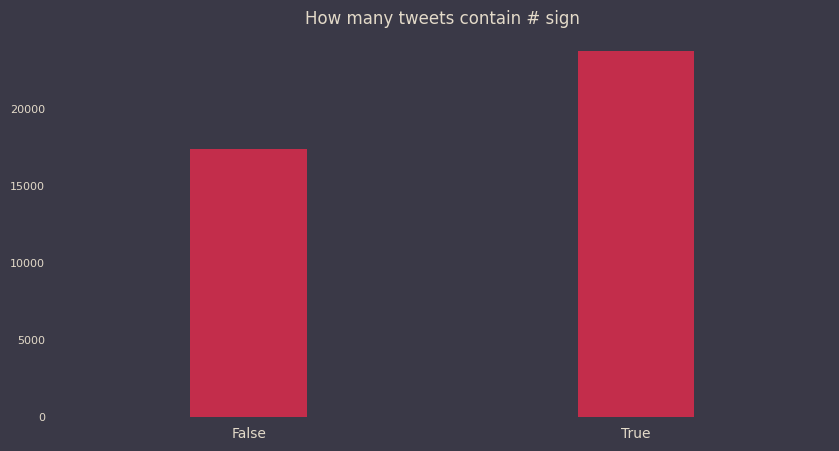

In [60]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="is_hashtag", data=df,ax=ax,color='crimson',width=0.3)
ax.set_ylabel('')
ax.set_ylabel('')
ax.set_xlabel('')

ax.tick_params(axis='y', colors='#3a3947')
ax.tick_params(axis='x', colors='#3a3947')

ax.tick_params(axis='y', labelsize=8)

ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center',color='#e3dac9')
ax.set_yticklabels(ax.get_yticklabels(),color='#e3dac9')

ax.set_facecolor('#3a3947')
ax.set_title("How many tweets contain # sign",color='#e3dac9')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('#3a3947')
fig.set_facecolor('#3a3947')

C:\Users\bzabk\AppData\Local\Temp\ipykernel_41280\4150927809.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center',color='#e3dac9')
C:\Users\bzabk\AppData\Local\Temp\ipykernel_41280\4150927809.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),color='#e3dac9')


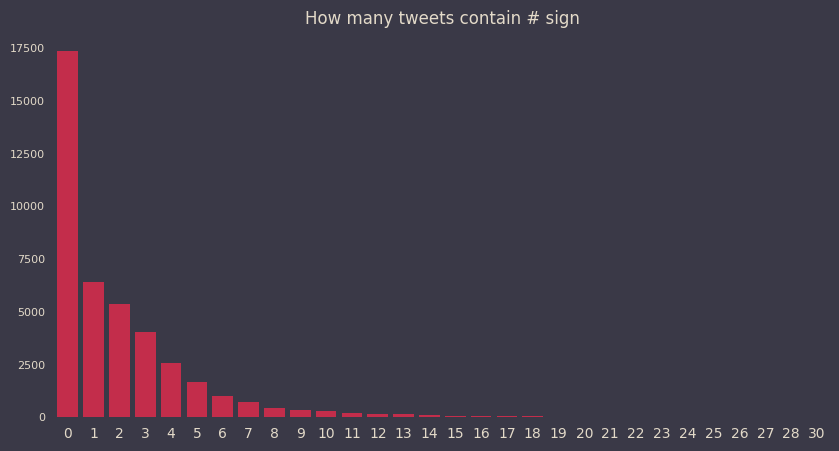

In [62]:
df["number_of_hashtags"] = df["OriginalTweet"].apply(lambda x: x.count("#"))
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="number_of_hashtags", data=df,ax=ax,color='crimson')
ax.set_ylabel('')
ax.set_ylabel('')
ax.set_xlabel('')

ax.tick_params(axis='y', colors='#3a3947')
ax.tick_params(axis='x', colors='#3a3947')

ax.tick_params(axis='y', labelsize=8)

ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center',color='#e3dac9')
ax.set_yticklabels(ax.get_yticklabels(),color='#e3dac9')

ax.set_facecolor('#3a3947')
ax.set_title("How many tweets contain # sign",color='#e3dac9')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('#3a3947')
fig.set_facecolor('#3a3947')

Sentiment
Extremely Negative     5481
Negative               9917
Neutral                7713
Positive              11422
Extremely Positive     6624
Name: number_of_hashtags, dtype: int64


C:\Users\bzabk\AppData\Local\Temp\ipykernel_41280\3479327028.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center',color='#e3dac9')
C:\Users\bzabk\AppData\Local\Temp\ipykernel_41280\3479327028.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),color='#e3dac9')


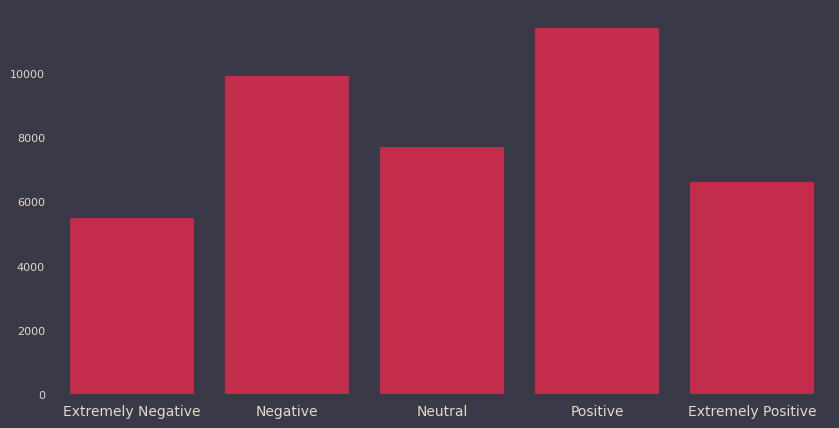

In [77]:
sentiment_per_hashtags = df.groupby("Sentiment")["number_of_hashtags"].count()
new_index_order = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']
sentiment_per_hashtags = sentiment_per_hashtags.reindex(new_index_order)
print(sentiment_per_hashtags)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=sentiment_per_hashtags.index, y=sentiment_per_hashtags.values, ax=ax, color='crimson')
ax.set_ylabel('')
ax.set_ylabel('')
ax.set_xlabel('')

ax.tick_params(axis='y', colors='#3a3947')
ax.tick_params(axis='x', colors='#3a3947')

ax.tick_params(axis='y', labelsize=8)

ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center',color='#e3dac9')
ax.set_yticklabels(ax.get_yticklabels(),color='#e3dac9')

ax.set_facecolor('#3a3947')
ax.set_title("",color='#e3dac9')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('#3a3947')
fig.set_facecolor('#3a3947')